<a href="https://colab.research.google.com/github/violetafurculita/ML-AI-UC-Berkeley-Course/blob/main/Module_17_Comparing_Classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

**Solution**

The dataset collected is related to **17 campaigns** that occurred between May 2008 and November 2010, corresponding to a total of 79354 contacts.

During these phone campaigns, **an attractive long-term deposit application, with good interest rates, was offered**.

For the whole database considered, there were 6499 successes (8% success rate).

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
#Import all libraries we need to work on this problem
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import missingno as msno
import time
from tabulate import tabulate
from plotly.figure_factory import create_table
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, KBinsDiscretizer, StandardScaler, QuantileTransformer,LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:

1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

# social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



**Solution**

In the following steps we will analyze the data to better understand the factors that impact a customer's decision to buy a term deposit product.

In [4]:
#Display the data type and the Columns in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

<Axes: >

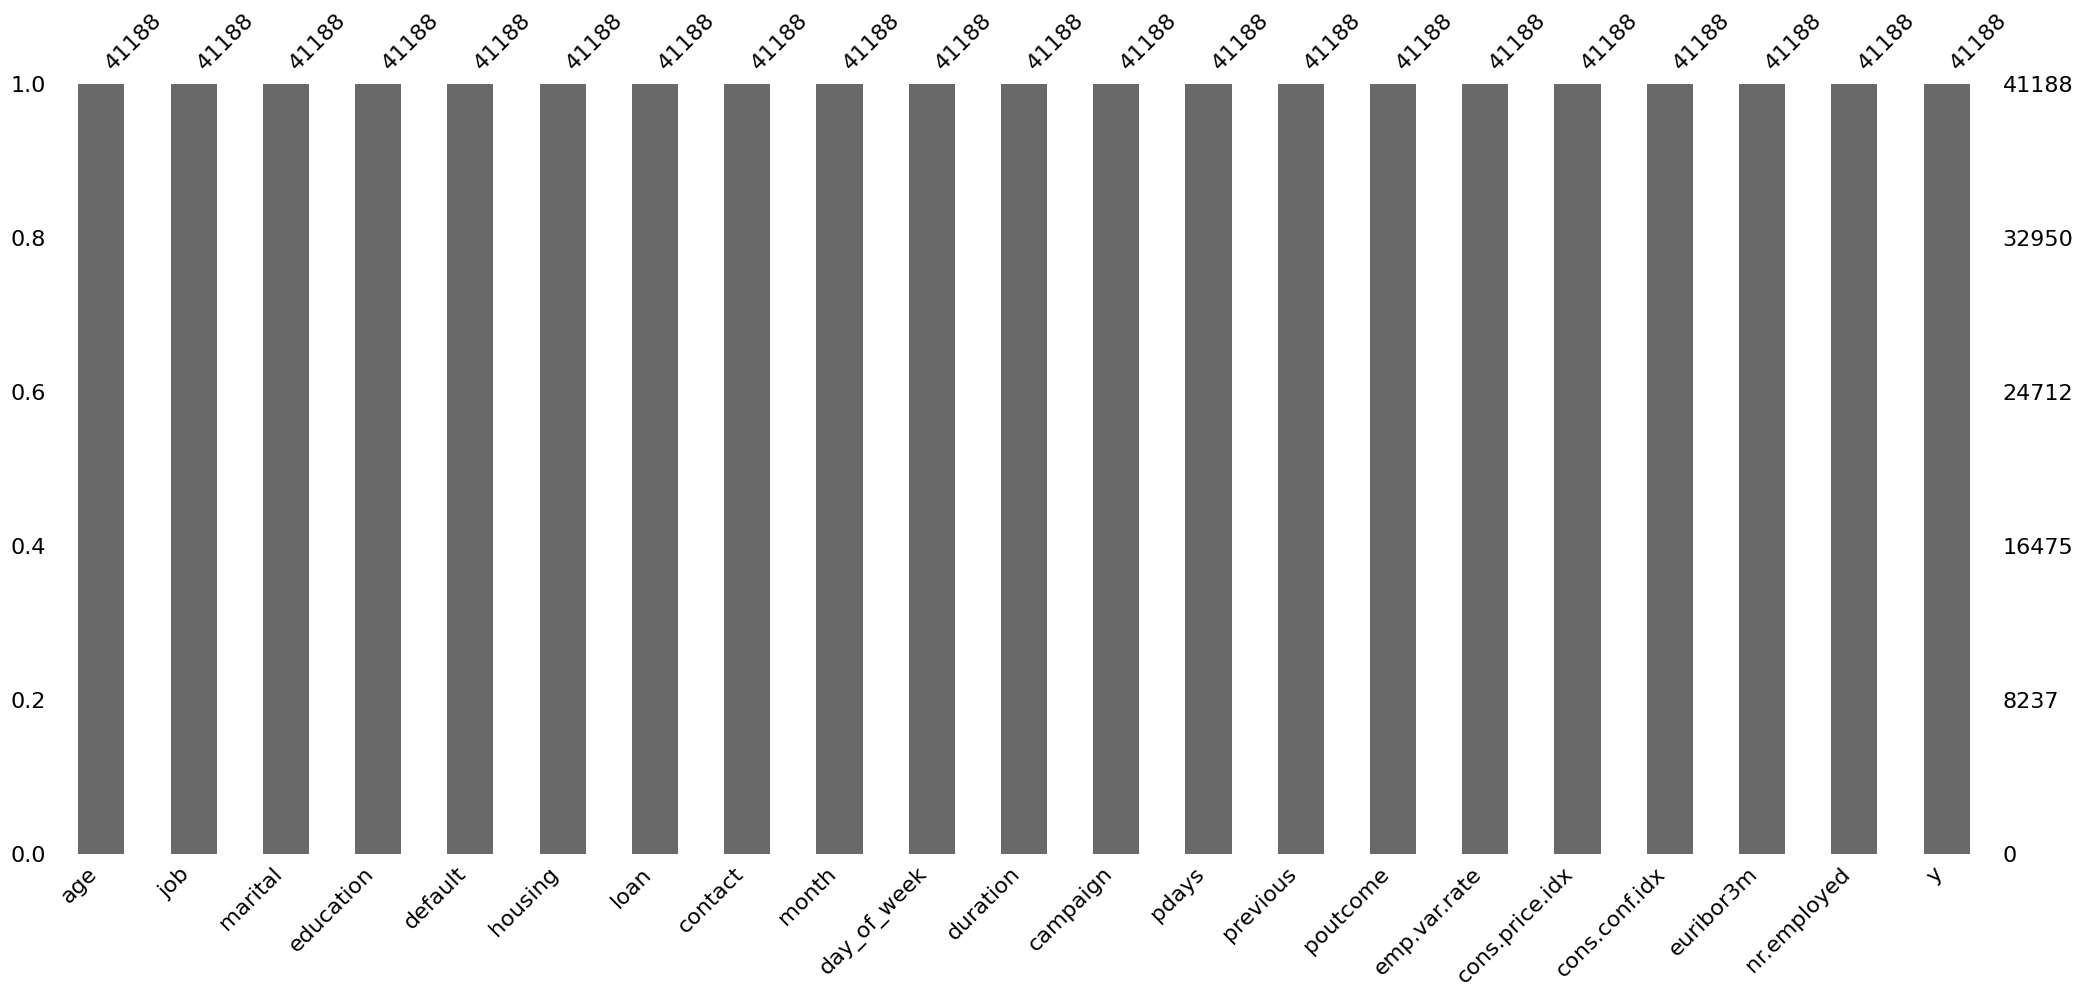

In [5]:
#Visualize the data to check for missing values
msno.bar(df)


**Observation**

No missing values in the data set

<Axes: >

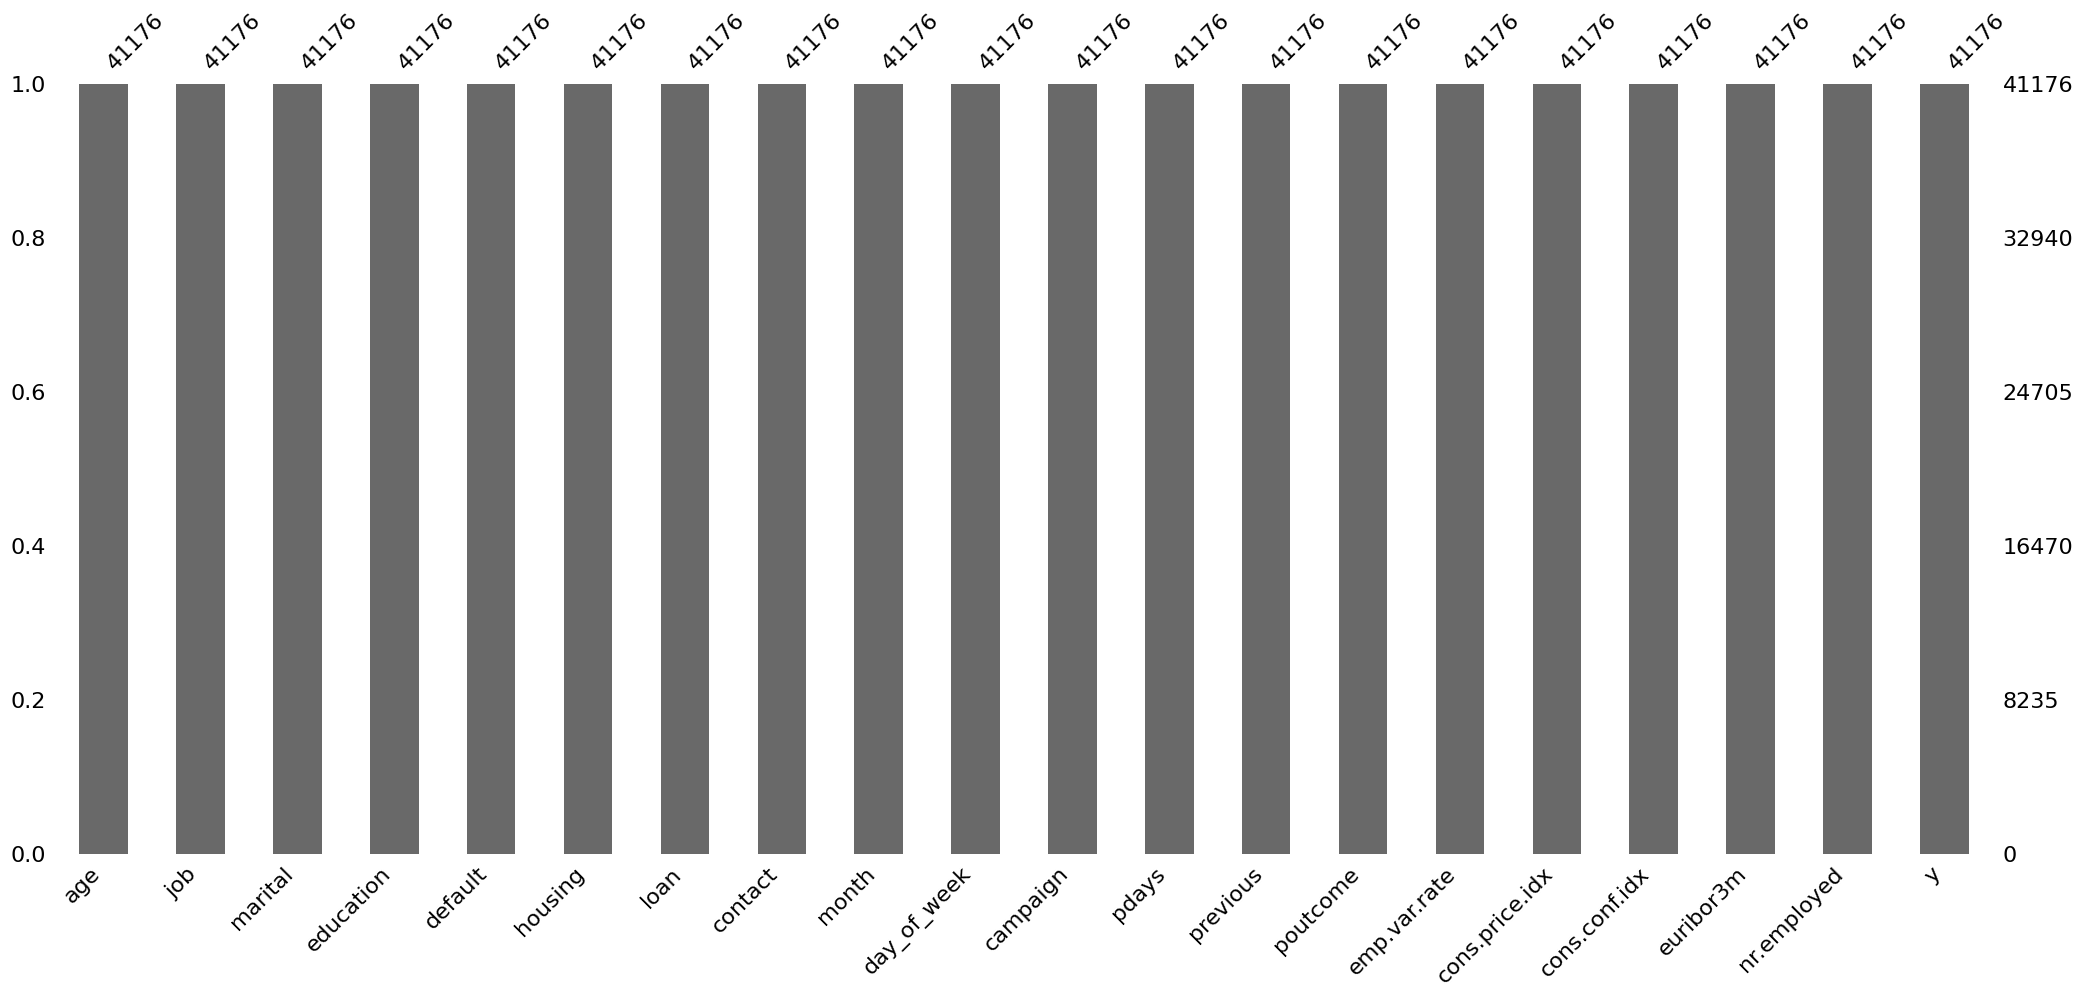

In [6]:
# Remove any NaN data and duplicates
df.dropna()
df.drop_duplicates(inplace=True)

#Remove the 'duration' column as suggested in the input notes above
df.drop('duration', axis=1, inplace=True)

#Reset the eindex after dropping duplicates and not available values
df=df.reset_index(drop=True)

#visualize data chnages post duplicates and NaN removal
msno.bar(df)


**Observation** After duplicates and NaN removals data adjusted from 41188 rows to 41176.

In [7]:
#Update column names to remove the periods from their names for easy handling
df.rename(columns={'emp.var.rate':'emp_var_rate', 'cons.price.idx':'cons_price_idx', 'cons.conf.idx':'cons_conf_idx','nr.employed':'nr_employed', 'euribor3m':'euribor_3m'}, inplace=True)

#visualize the dataframe with updated column names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  campaign        41176 non-null  int64  
 11  pdays           41176 non-null  int64  
 12  previous        41176 non-null  int64  
 13  poutcome        41176 non-null  object 
 14  emp_var_rate    41176 non-null  float64
 15  cons_price_idx  41176 non-null  float64
 16  cons_conf_idx   41176 non-null  float64
 17  euribor_3m      41176 non-null 

**Now let's take a look at the data to see how various features impact the target variable Y - whether the client bought or not a term deposit**

Look at the distribution of clients who bought and did not buy the term deposit as a result of the marketing campaign

In [8]:
#create a copy of the original dataframe so we can use the copy for data visualization
df_copy = df.copy()

#Replace float values Yes and No with 1 and 0 to create better visuals
df_copy['y'] = df_copy['y'].replace({'yes': 1, 'no': 0})


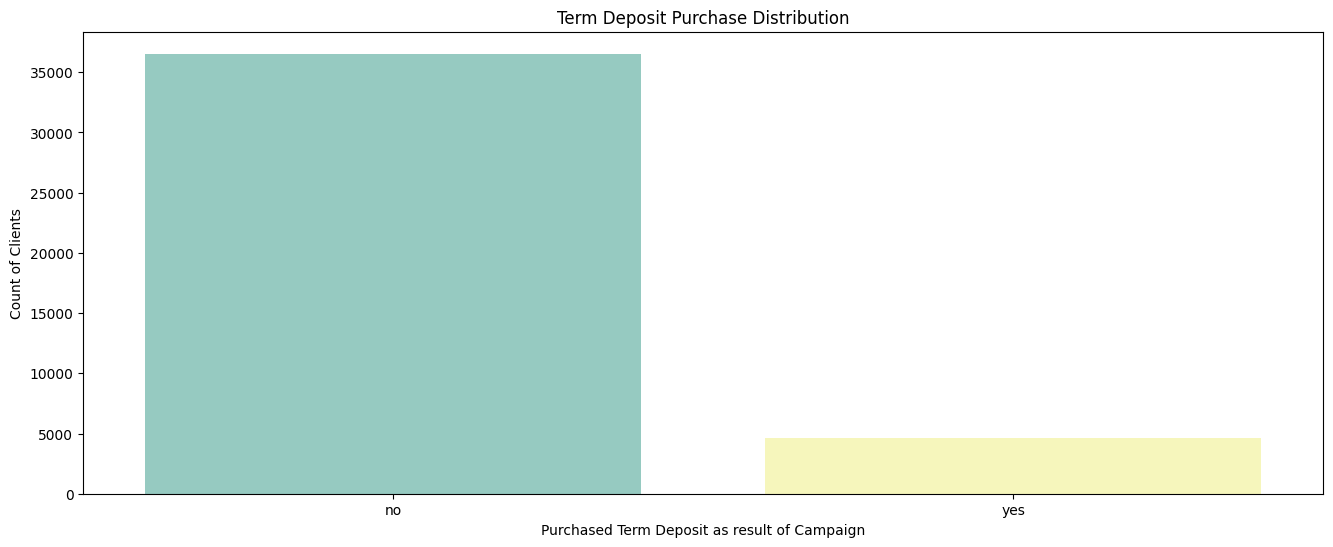

In [9]:
value_counts = df_copy['y'].value_counts()
color_palette = sns.color_palette("Set3")

plt.figure(figsize=(16, 6))
sns.countplot(x='y', data=df, palette=color_palette)
plt.title('Term Deposit Purchase Distribution')
plt.xlabel('Purchased Term Deposit as result of Campaign')
plt.ylabel('Count of Clients')

plt.show()

**Observation**
About 8% of clients only baught the term deposit product.

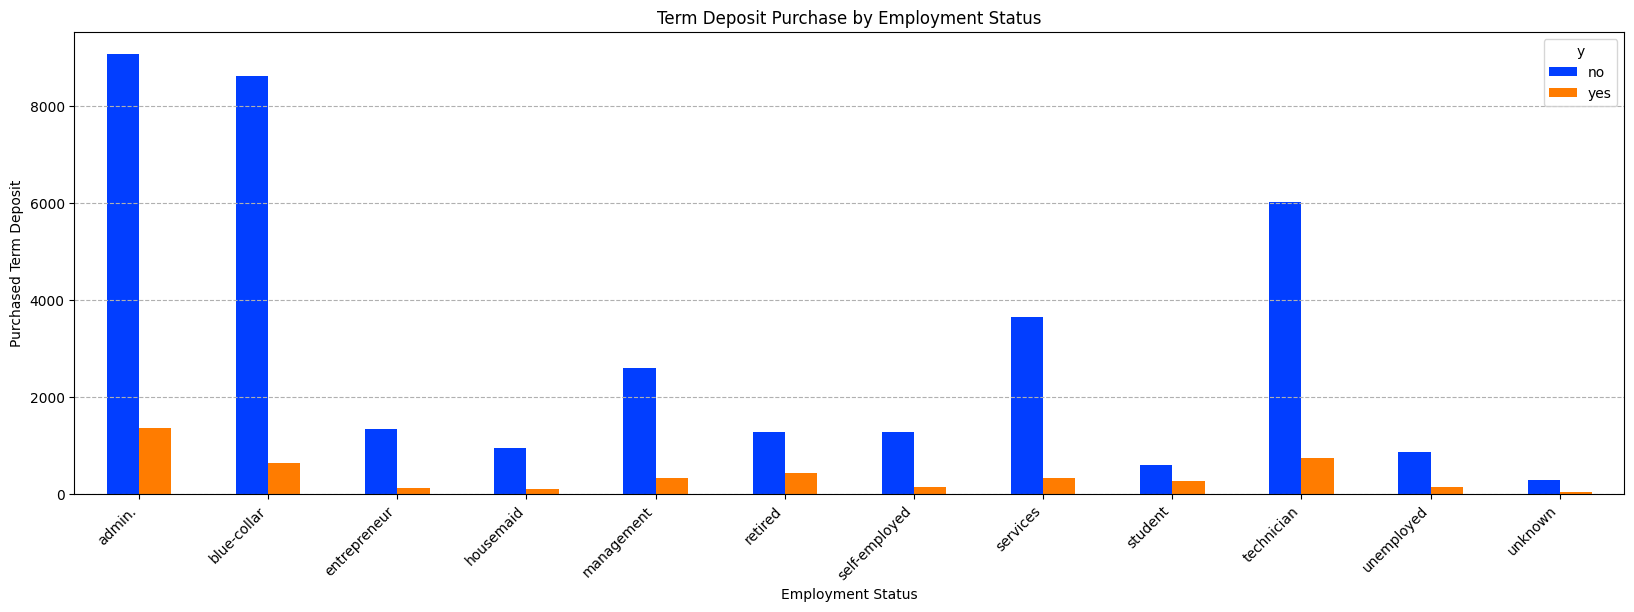

In [10]:
df_copy.groupby('y').mean()
colors = sns.color_palette('bright')
pd.crosstab(df.job,df.y).plot(kind="bar",figsize=(20,6), color = colors)
plt.title('Term Deposit Purchase by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Purchased Term Deposit')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')

plt.show()

**Observation** Customers with jobs in the admin, technician and blue collar buy the term deposit product.

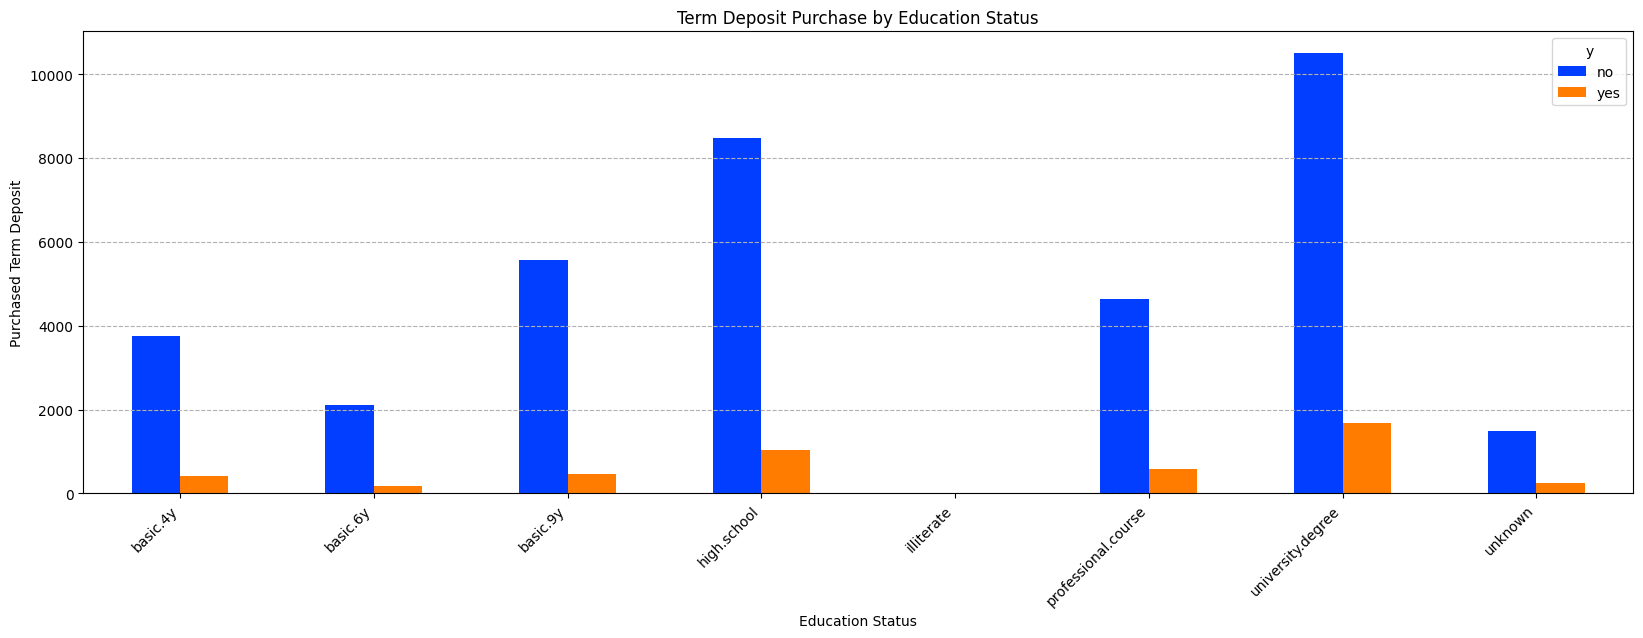

In [11]:
df_copy.groupby('y').mean()
colors = sns.color_palette('bright')
pd.crosstab(df.education,df.y).plot(kind="bar",figsize=(20,6), color = colors)
plt.title('Term Deposit Purchase by Education Status')
plt.xlabel('Education Status')
plt.ylabel('Purchased Term Deposit')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')

plt.show()


**Observation** Customers with university degrees and high school degrees buy the term deposit product.

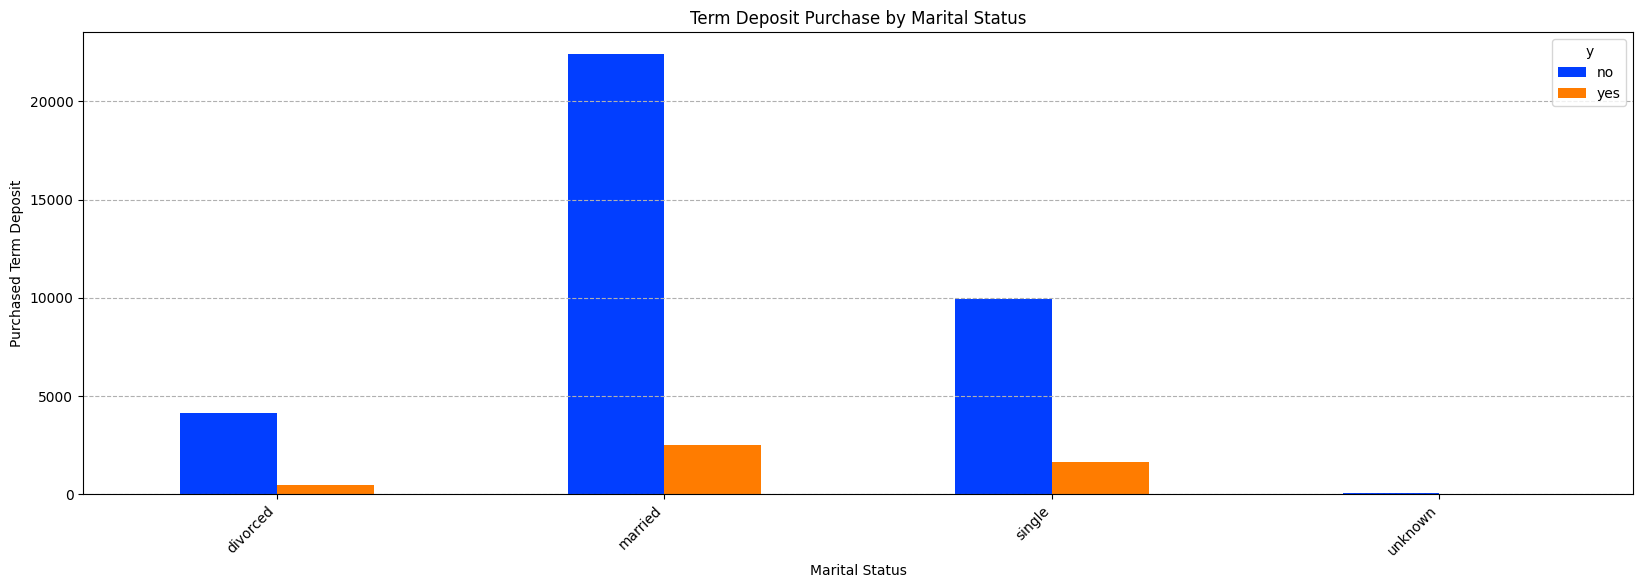

In [12]:
df_copy.groupby('y').mean()
colors = sns.color_palette('bright')
pd.crosstab(df.marital,df.y).plot(kind="bar",figsize=(20,6), color = colors)
plt.title('Term Deposit Purchase by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Purchased Term Deposit')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')

plt.show()


**Observation** Married and single customers buy the product.

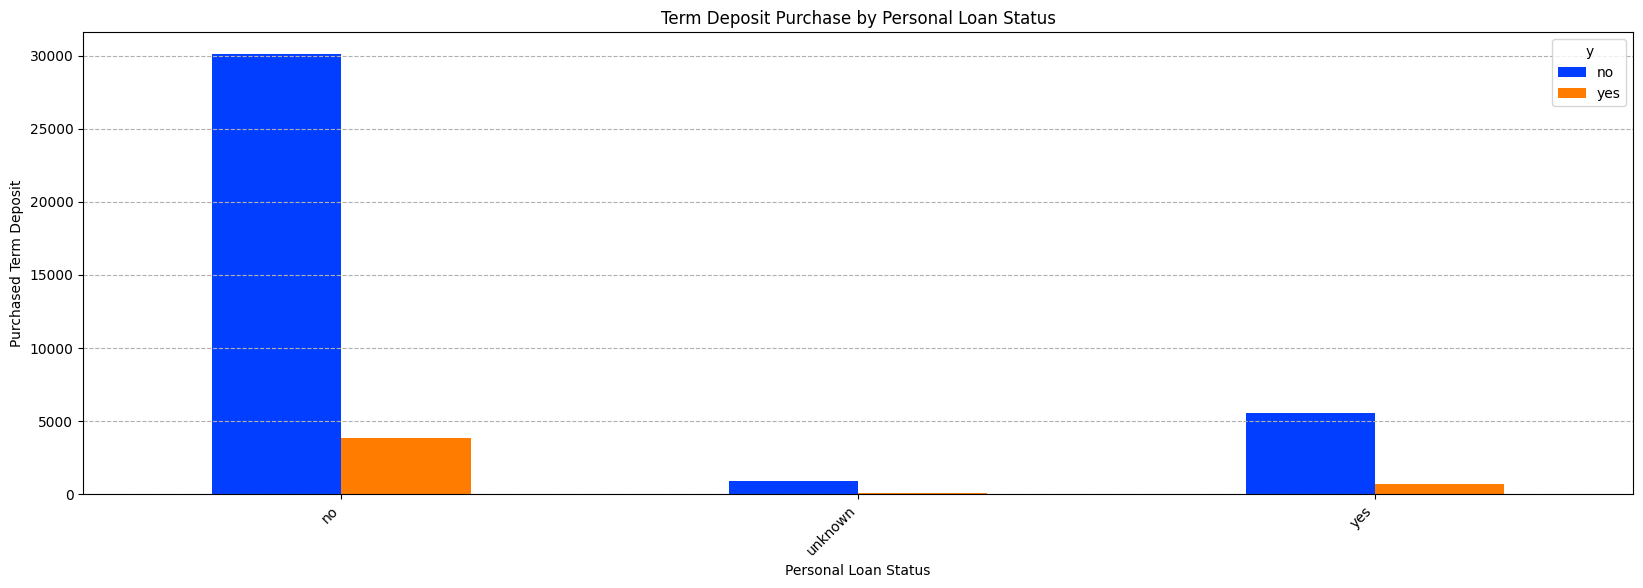

In [13]:
df_copy.groupby('y').mean()
colors = sns.color_palette('bright')
pd.crosstab(df.loan,df.y).plot(kind="bar",figsize=(20,6), color = colors)
plt.title('Term Deposit Purchase by Personal Loan Status')
plt.xlabel('Personal Loan Status')
plt.ylabel('Purchased Term Deposit')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')

plt.show()

**Observation** customers without personal loans buy the product.

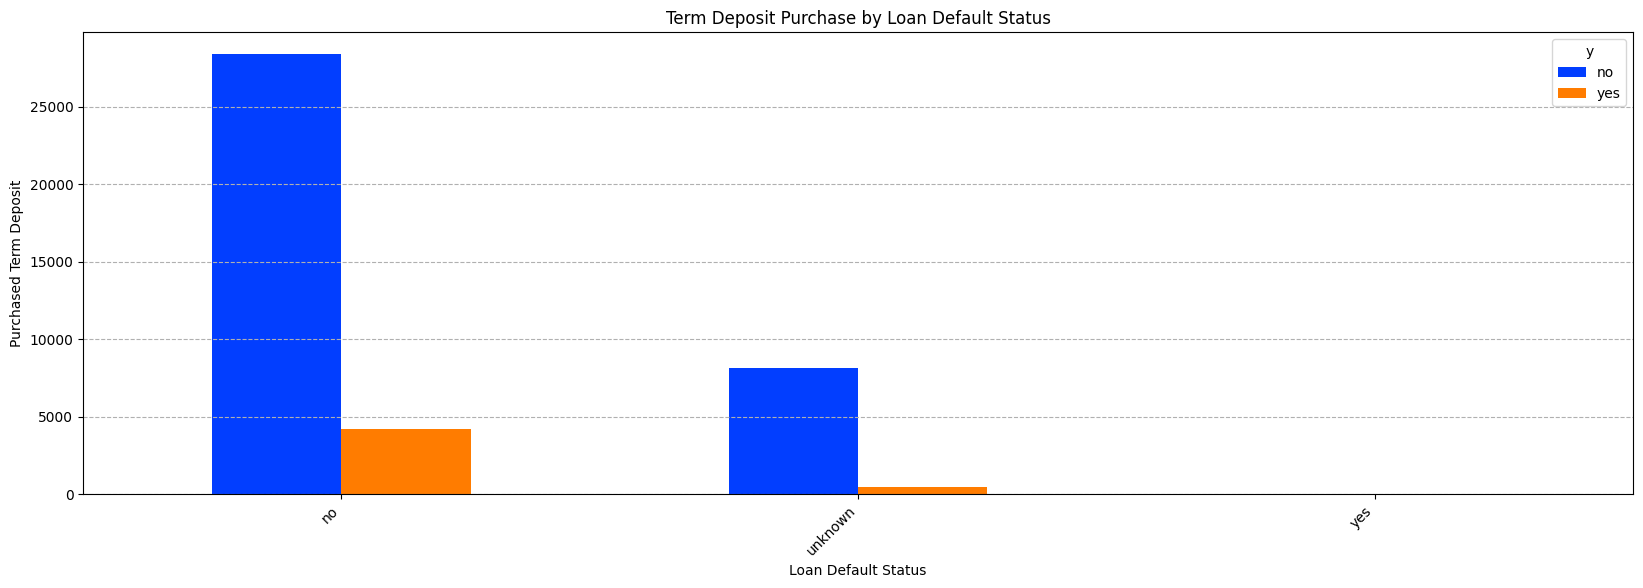

In [14]:
df_copy.groupby('y').mean()
colors = sns.color_palette('bright')
pd.crosstab(df.default,df.y).plot(kind="bar",figsize=(20,6), color = colors)
plt.title('Term Deposit Purchase by Loan Default Status')
plt.xlabel('Loan Default Status')
plt.ylabel('Purchased Term Deposit')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')

plt.show()

**Observation** customers who have not defaulted on personal loans buy the product.

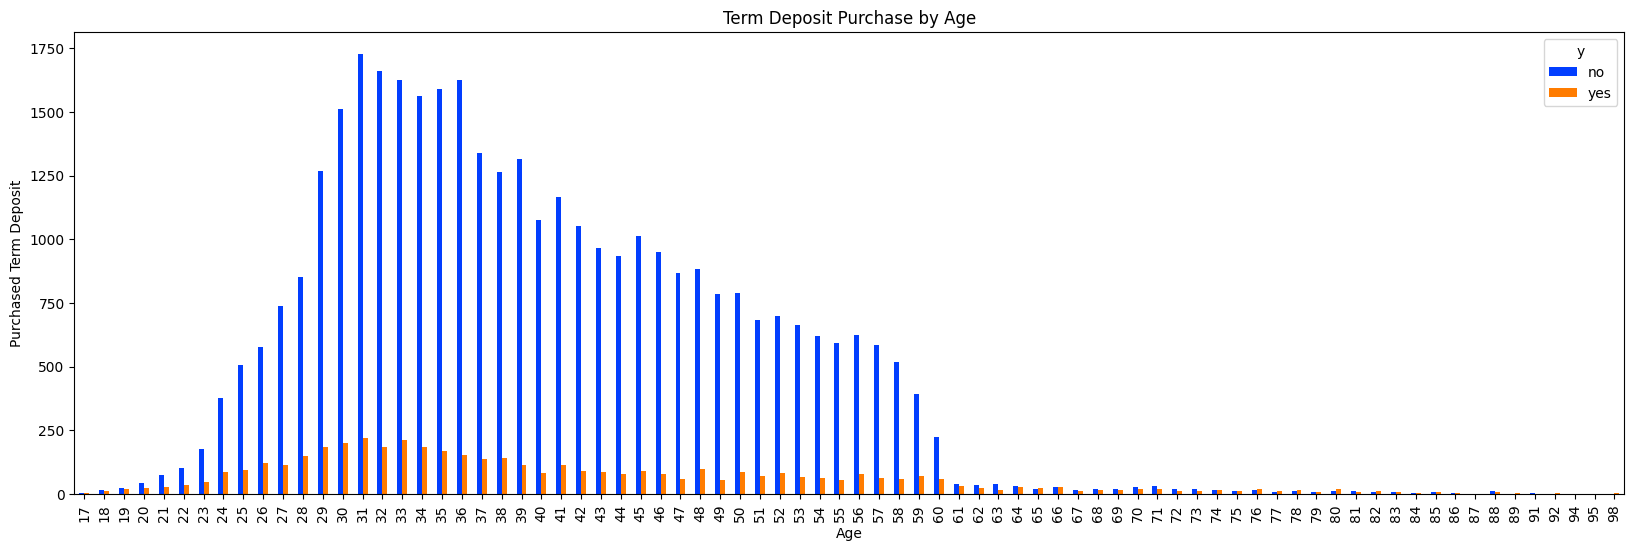

In [15]:
df_copy.groupby('y').mean()
colors = sns.color_palette('bright')
pd.crosstab(df.age,df.y).plot(kind="bar",figsize=(20,6), color = colors)
plt.title('Term Deposit Purchase by Age')
plt.xlabel('Age')
plt.ylabel('Purchased Term Deposit')
plt.show()

**Observation**
Customers age 25-60 buy the term deposit product.

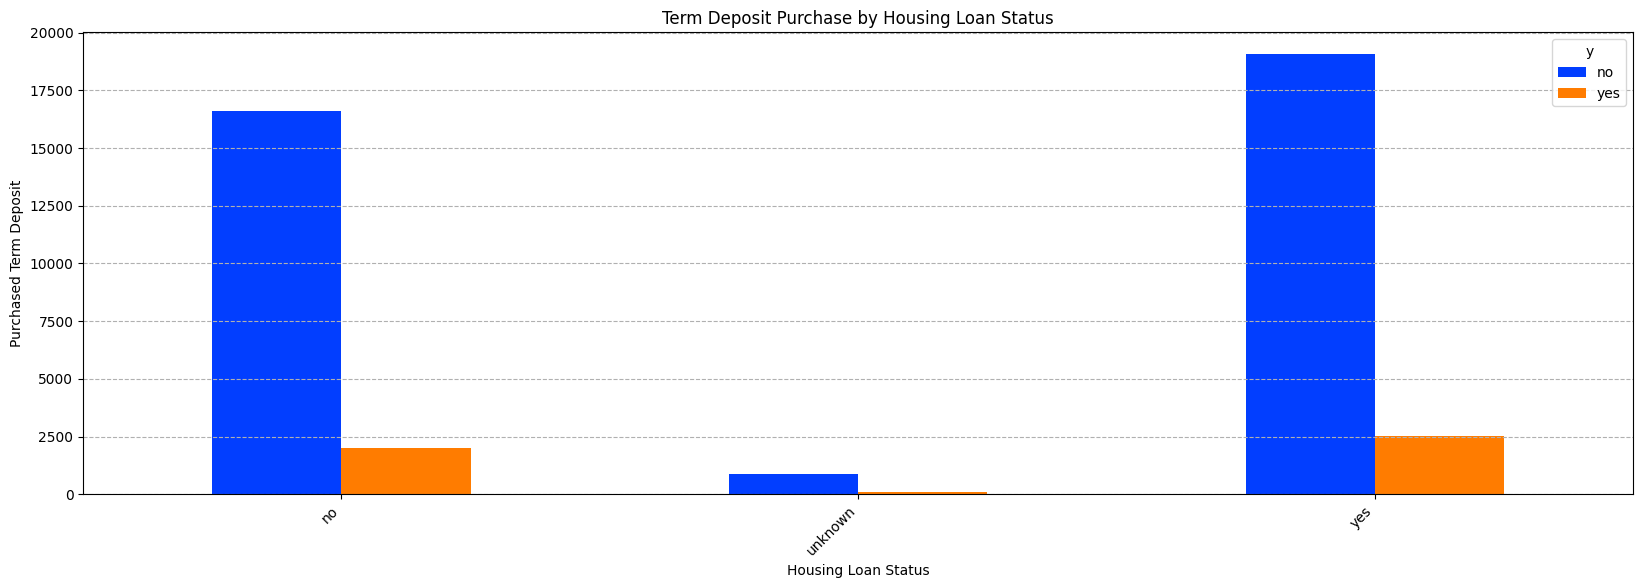

In [16]:
df_copy.groupby('y').mean()
colors = sns.color_palette('bright')
pd.crosstab(df.housing,df.y).plot(kind="bar",figsize=(20,6), color = colors)
plt.title('Term Deposit Purchase by Housing Loan Status')
plt.xlabel('Housing Loan Status')
plt.ylabel('Purchased Term Deposit')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')

plt.show()

**Observation** customers wih a house loan tend to buy the term deposit more than those without a housing loan, though the difference is small.

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

**Business Objective** - **Predict whether a portugese banking client will buy or not a term deposit product**

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

**Solution**

**To begin we will look at the data types and convert any categorical columns from objects and floats to integers to help with the modeling later on.**

In [17]:
#create a new dataframe that contain only the first 7 columns plus the column y from the original dataframe
selected_columns = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'y']

new_df = df[selected_columns].copy()

new_df.head()

,age,job,marital,education,default,housing,loan,y
0,56,housemaid,married,basic.4y,no,no,no,no
1,57,services,married,high.school,unknown,no,no,no
2,37,services,married,high.school,no,yes,no,no
3,40,admin.,married,basic.6y,no,no,no,no
4,56,services,married,high.school,no,no,yes,no


In [18]:
new_df = new_df.select_dtypes(include=object)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job        41176 non-null  object
 1   marital    41176 non-null  object
 2   education  41176 non-null  object
 3   default    41176 non-null  object
 4   housing    41176 non-null  object
 5   loan       41176 non-null  object
 6   y          41176 non-null  object
dtypes: object(7)
memory usage: 2.2+ MB


In [19]:
#for all columns that contain non integers data need to see how many unique values exist so we can determine the encoder to use
new_df.nunique()


job          12
marital       4
education     8
default       3
housing       3
loan          3
y             2
dtype: int64

**All the columns that contain object and float data need to be encoded and transformed to integer values for easy modeling. We will use One Hot Encoder for all the categorical columns so we can avoid introducing unintended relationships between data.**

In [20]:
#start encoding with One Hot Encoder
encoder=OneHotEncoder(sparse=False)

#identify all columns that contain object data and need to be encoded
obj_cols = ['job', 'marital', 'education','default','housing','loan']

#encode all object columns
df_encode = pd.DataFrame(encoder.fit_transform(new_df[obj_cols]))
df_encode.columns = encoder.get_feature_names_out(obj_cols)
new_df.drop(obj_cols ,axis=1, inplace=True)
df_ready = pd.concat([new_df, df_encode], axis=1)

df_ready.head()

,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes
0,no,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,no,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [21]:
df_ready.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   y                              41176 non-null  object 
 1   job_admin.                     41176 non-null  float64
 2   job_blue-collar                41176 non-null  float64
 3   job_entrepreneur               41176 non-null  float64
 4   job_housemaid                  41176 non-null  float64
 5   job_management                 41176 non-null  float64
 6   job_retired                    41176 non-null  float64
 7   job_self-employed              41176 non-null  float64
 8   job_services                   41176 non-null  float64
 9   job_student                    41176 non-null  float64
 10  job_technician                 41176 non-null  float64
 11  job_unemployed                 41176 non-null  float64
 12  job_unknown                    41176 non-null 

**Observation**

**The new dataframe contains 34 features or 33 features in addition to the feature that needs to be predicted - y.**

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

**Solution**

**We will split the dataframe into a training and a test set. WE will use the Synthetic Minority Over-sampling Technique on the training set due to the imbalance in the predictive feature of No vs Yes. The split between training and test sets will be 70/30 ratio.**

In [22]:
#Remove the column y from the df_ready dataframe and create a new dataframe that does not contain y
cols = df_ready.columns
index = np.argwhere(cols == 'y')
cols_new = np.delete(cols, index)
X_data = pd.DataFrame(df_ready, columns=cols_new)

# Create a new data frame with only the y column
selected_columns = ['y']
y_data = df_ready[selected_columns].copy()

# Define X and y
X = X_data
y=y_data

# Split data into 70/30 ratio between training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

#Rebalance the training set with the Synthetic Minority Over-sampling Technique
smote = SMOTE(random_state = 101)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


print(X_train_smote.shape, y_train_smote.shape)
print(X_test.shape, y_test.shape)

(51216, 33) (51216, 1)
(12353, 33) (12353, 1)


In [23]:
X_train.describe()


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes
count,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,...,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000
mean,0.253443,0.226278,0.034764,0.026923,0.070638,0.041252,0.033168,0.096520,0.020366,0.163966,...,0.042050,0.791347,0.208549,0.000104,0.450751,0.023315,0.525934,0.823231,0.023315,0.153454
std,0.434990,0.418428,0.183184,0.161861,0.256224,0.198875,0.179078,0.295308,0.141250,0.370251,...,0.200706,0.406353,0.406278,0.010202,0.497577,0.150904,0.499336,0.381479,0.150904,0.360431
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Observation**

**The training data set contains 33 features. This typically leads to model complexity. We will use Principal Component Analysis - a dimentionality reduction technique to help us select the features that deliver the maximum amount of information or variance in the dataset.**

In [24]:
#Run PCA and determine what number of features explain the maximum variance in the dataset
pca = PCA()
pca.fit(X_train)
pca.explained_variance_ratio_[:20].sum()


0.9833069680370983

**Observation** - **20 features explain 98% of the variance in the dataset. We will use the first 20 features.**

In [25]:
#Use the identified 20 features to train and test
pca = PCA(n_components = 20)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

**Solution**

**We will build a baseline model using Logistic Regression and a scaler. In this instance we will use the Standard Scaler as we want to preserve the shape of the original distribution.**

In [26]:
# Define the pipeline with StandardScaler and LogisticRegression
pipes = {
    'lr': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression())  # Logistic Regression classifier
    ])
}

#Define the Baseline Model
scores = {}
y_preds = {}
for model_name, pipeline in pipes.items():
    pipeline.fit(X_train, y_train.values.ravel())
    y_preds[model_name] = pipeline.predict(X_test)
    score = cross_val_score(pipeline, X_train, y_train.values.ravel(), cv=5, scoring='accuracy').mean()
    score_time = np.mean(cross_validate(pipeline, X_train, y_train.values.ravel())['score_time'])
    scores[model_name] = {'score': score, 'score_time': score_time}
    print(f"Baseline model performance accuracy score {score:.4f} and fit time {score_time:.4f}")

Baseline model performance accuracy score 0.8884 and fit time 0.0256


**Observation**

**The Baseline model has a pretty decent performance considering the accuracy and fit time.**

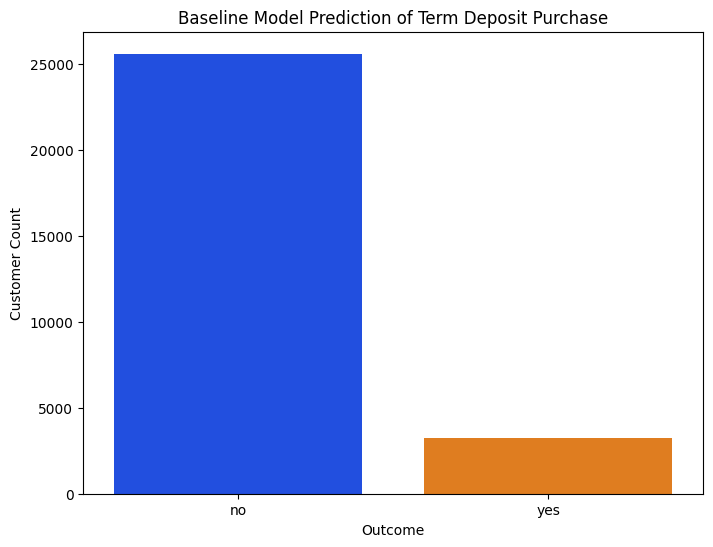

In [27]:
# Retrieve the predicted labels for the logistic regression Baseline Model
y_pred_base = y_preds['lr']

# Create a bar plot to showcase the predictions
plt.figure(figsize=(8, 6))
sns.barplot(x=y_train['y'].value_counts().index, y=y_train['y'].value_counts(), palette="bright")
plt.title('Baseline Model Prediction of Term Deposit Purchase')
plt.xlabel('Outcome')
plt.ylabel('Customer Count')

plt.show()

**Observation**

**The Baseline model predictions are in line with the actual dataset**

<Figure size 800x600 with 0 Axes>

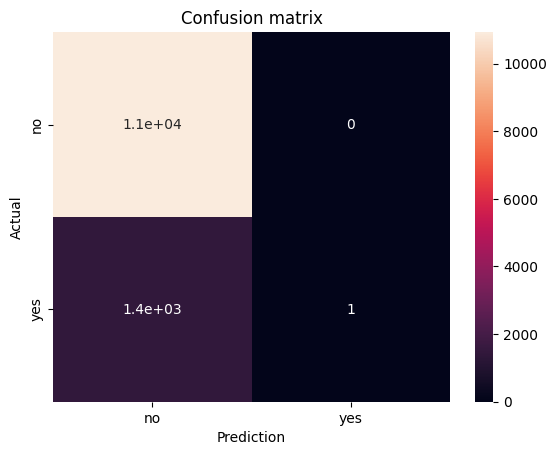

In [28]:
# Evaluate the model
cm = confusion_matrix(y_test, y_pred_base)
plt.figure(figsize=(8, 6))
fig, ax = plt.subplots(1)
cmap = sns.color_palette("bright")
# Use seaborn's heatmap function
ax = sns.heatmap(cm, ax=ax, annot=True)
ax.set_xlabel('Prediction')
ax.set_ylabel('Actual')

# Set the title
ax.set_title('Confusion matrix')

# Set the x-axis and y-axis labels
ax.set_xticklabels(['no', 'yes'])
ax.set_yticklabels(['no', 'yes'])

plt.show()

In [29]:
# Evaluate the model by showcasing its precision, recall and f1 scores
print(classification_report(y_test, y_pred_base))

              precision    recall  f1-score   support

          no       0.88      1.00      0.94     10929
         yes       1.00      0.00      0.00      1424

    accuracy                           0.88     12353
   macro avg       0.94      0.50      0.47     12353
weighted avg       0.90      0.88      0.83     12353



### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [30]:
#Build a Simple model using Logistic Regression and Standard Scaler to scale the train and test data

#define the scaler
scaler = StandardScaler()

#scale the train and test data we used PCA with 20 features
X_train_pca_scaled = scaler.fit_transform(X_train_pca)
X_test_pca_scaled = scaler.transform(X_test_pca)

#define the model
simp_model = LogisticRegression()

#fit the model
simp_model.fit(X_train_pca_scaled, y_train.values.ravel())

#predict the labels
y_pred_scaled = simp_model.predict(X_test_pca_scaled)


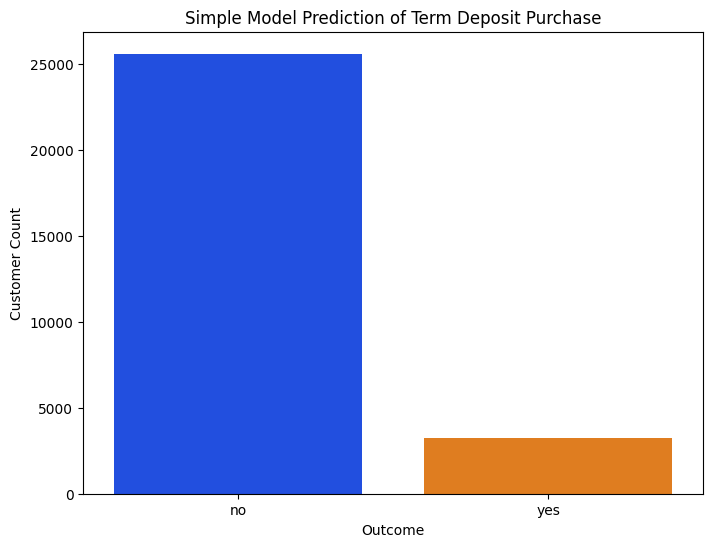

In [31]:
# Retrieve the predicted labels for the logistic regression Baseline Model
y_pred_scaled = simp_model.predict(X_test_pca_scaled)

# Create a bar plot to showcase the predictions
plt.figure(figsize=(8, 6))
sns.barplot(x=y_train['y'].value_counts().index, y=y_train['y'].value_counts(), palette="bright")
plt.title('Simple Model Prediction of Term Deposit Purchase')
plt.xlabel('Outcome')
plt.ylabel('Customer Count')

plt.show()

<Figure size 800x600 with 0 Axes>

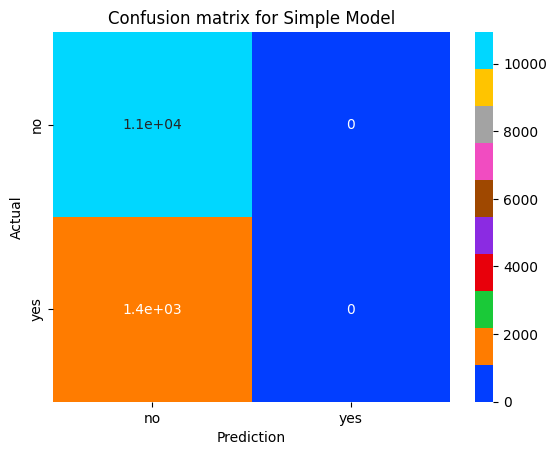

In [32]:
# Evaluate the model by showcasing its confusion matrix

cm = confusion_matrix(y_test, y_pred_scaled)
plt.figure(figsize=(8, 6))
fig, ax = plt.subplots(1)
cmap = sns.color_palette("bright")
ax = sns.heatmap(cm, ax=ax, annot=True, cmap=cmap)

# Set the title
ax.set_title('Confusion matrix for Simple Model')
ax.set_xlabel('Prediction')
ax.set_ylabel('Actual')

# Set the x-axis and y-axis labels
ax.set_xticklabels(['no', 'yes'])
ax.set_yticklabels(['no', 'yes'])

plt.show()

In [33]:
# Evaluate the model by showcasing its precision, recall and f1 scores
print(classification_report(y_test, y_pred_scaled))

              precision    recall  f1-score   support

          no       0.88      1.00      0.94     10929
         yes       0.00      0.00      0.00      1424

    accuracy                           0.88     12353
   macro avg       0.44      0.50      0.47     12353
weighted avg       0.78      0.88      0.83     12353



### Problem 9: Score the Model

What is the accuracy of your model?

In [34]:
# Calculate accuracy score using cross_val_score
accuracy_scores = cross_val_score(simp_model, X_train_pca, y_train.values.ravel(), scoring="accuracy")
accuracy_mean = np.mean(accuracy_scores)

# Calculate score time using cross_validate
score_times = cross_validate(simp_model, X_train_pca, y_train, scoring="accuracy", return_train_score=True)["score_time"]
score_time_mean = np.mean(score_times)

# Create a table with the results
table = [["Model", "Accuracy Score", "Score Time"],
         [simp_model.__class__.__name__, accuracy_mean, score_time_mean]]

# Print the table
print(tabulate(table, headers="firstrow", tablefmt="fancy_grid"))

╒════════════════════╤══════════════════╤══════════════╕
│ Model              │   Accuracy Score │   Score Time │
╞════════════════════╪══════════════════╪══════════════╡
│ LogisticRegression │         0.888457 │    0.0226327 │
╘════════════════════╧══════════════════╧══════════════╛


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [35]:
# Create a DataFrame to store the results
compare_data ={'Model' : ['Logistic Regression','KNN', 'Decision Tree', 'SVM'],
               'Train Time':[],
               'Train Accuracy' : [],
               'Test Accuracy' : [], }

#define pipelines that consist of two steps: a scaler and a classifier
pipes = {
    'lr': Pipeline([('scaler', StandardScaler()), ('classifier', LogisticRegression())]),
    'knn': Pipeline([('scaler', StandardScaler()), ('classifier', KNeighborsClassifier())]),
    'dt': Pipeline([('scaler', StandardScaler()), ('classifier', DecisionTreeClassifier())]),
    'svm': Pipeline([('scaler', StandardScaler()), ('classifier', SVC())]),
}

#fit and score each model
scores = {}
y_preds = {}
for model_name, pipeline in pipes.items():
    pipeline.fit(X_train, y_train.values.ravel())
    scores_val = cross_validate(pipeline, X_train_pca, y_train, scoring="accuracy", return_train_score=True)
    train_score_pipe = np.mean(scores_val['train_score'])
    test_score_pipe = np.mean(scores_val['test_score'])
    fit_time_pipe = np.mean(scores_val['fit_time'])
    compare_data['Train Time'].append(fit_time_pipe)
    compare_data['Train Accuracy'].append(train_score_pipe)
    compare_data['Test Accuracy'].append(test_score_pipe)

#create a dataframe to showcase the scores of each model
df_scores_pipe = pd.DataFrame.from_dict(compare_data)
df_scores_pipe.set_index('Model', inplace=True)
df_scores_pipe.head()

,Train Time,Train Accuracy,Test Accuracy
Model,,,
Logistic Regression,0.073300,0.888457,0.888457
KNN,0.031273,0.882516,0.879992
Decision Tree,0.175627,0.891337,0.885369
SVM,6.362887,0.888752,0.888353


In [36]:
#show the above results in a table format
table = df_scores_pipe.reset_index().values.tolist()
headers = df_scores_pipe.columns.tolist()
print(tabulate(table, headers=headers, tablefmt="fancy_grid"))

╒═════════════════════╤══════════════╤══════════════════╤═════════════════╕
│                     │   Train Time │   Train Accuracy │   Test Accuracy │
╞═════════════════════╪══════════════╪══════════════════╪═════════════════╡
│ Logistic Regression │    0.0733004 │         0.888457 │        0.888457 │
├─────────────────────┼──────────────┼──────────────────┼─────────────────┤
│ KNN                 │    0.0312726 │         0.882516 │        0.879992 │
├─────────────────────┼──────────────┼──────────────────┼─────────────────┤
│ Decision Tree       │    0.175627  │         0.891337 │        0.885369 │
├─────────────────────┼──────────────┼──────────────────┼─────────────────┤
│ SVM                 │    6.36289   │         0.888752 │        0.888353 │
╘═════════════════════╧══════════════╧══════════════════╧═════════════════╛


**Observation**



*   **The best model by Test Accuracy is Logistic Regression followed by SVM. Combining Test accuracy with training time, Logistic Regression is considerably superior to SVM.**

*   **If train time and test accuracy are being optimized then KNN can be a pretty great predictive model considering its train time at 0.09 seconds with little test accuracy loss compared to Logistic Regression at 0.8787.**



### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

**Prompt**

 Now that we have some basic models on the board, we want to try to improve these. Below, we list a few things to explore in this pursuit.More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?

**Solution**

**We will explore further PCA and increasing the number of features to a number that can explain the rest of the features.**
**There is no gender feature in this dataset.**

In [37]:
#Run PCA and determine what number of features explain the maximum variance in the dataset
pca = PCA()
pca.fit(X_train)
pca.explained_variance_ratio_[:25].sum()


0.9999532396120756

**Observation**

**According to the above, we can use only 25 features to explain 99.99% of the variance in the dataset. Therefore we will use this new set for further tuning.**

In [38]:
#Use the identified 25 features to train and test the models to improve performance
pca = PCA(n_components = 25)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

**Prompt**

Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  

**Solution**

**Will further tune each model ran above to see if this improves the acuracy scores and fit time**

In [39]:
#apply new hyperparameters to the Logist regression to hopefully achieve better model performance
hyperparams_lgr = {'solver': ['liblinear'],#others ran lbfgs, sag
                   'penalty': ['l1'],#others ran l2
                   'C': [0.01],#others ran were 0.1,1,10,100
                   'max_iter': [100],#others ran 200,300,400,500
                   'class_weight': [ None],#others ran were balanced
                    }

# perform cross validation using the hyperparameters from above on the training data
grid_lgr = GridSearchCV(LogisticRegression(), param_grid=hyperparams_lgr).fit(X_train_pca, y_train)
best_params_lgr = grid_lgr.best_params_
lgr = LogisticRegression(**best_params_lgr)
lgr.fit(X_train_pca, y_train.values.ravel())

#Print the best hyperparameters for the Logistic Regression model
print(f'Best hyperparameters for {grid_lgr.estimator.__class__.__name__}: {best_params_lgr}')

Best hyperparameters for LogisticRegression: {'C': 0.01, 'class_weight': None, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [40]:
#apply new hyperparameters to K Nearest Neighbors model to hopefully achieve better model performance
hyperparams_knn = {'n_neighbors': [20],#others ran 3,5,10,15
                    'weights': ['uniform'],#others ran distance
                    'p': [3], #others ran 1,2
                    'algorithm': ['ball_tree'],
                   'leaf_size': [10]} #others ran 20,30

# perform cross validation using the hyperparameters from above on the training data
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid=hyperparams_knn).fit(X_train_pca, y_train)
best_params_knn = grid_knn.best_params_

#Print the best hyperparameters for the KNN model
print(f'Best hyperparameters for {grid_knn.estimator.__class__.__name__}: {best_params_knn}')

Best hyperparameters for KNeighborsClassifier: {'algorithm': 'ball_tree', 'leaf_size': 10, 'n_neighbors': 20, 'p': 3, 'weights': 'uniform'}


In [41]:
#apply new hyperparameters to Decision Tree model to hopefully achieve better model performance
hyperparams_dt = {'max_depth': [5],#others ran 10,15
                  'min_samples_split': [ 0.2], #others ran 0.1, 0.5
                  'min_samples_leaf': [1],#others ran 2,5
                  'class_weight': [None],#others ran balanced
                  'random_state': [42],
                  'criterion':['entropy']} #others ran gini

# perform cross validation using the hyperparameters from above on the training data
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid=hyperparams_dt).fit(X_train_pca, y_train)
best_params_dt = grid_dt.best_params_

#Print the best hyperparameters for the Decision Tree model
print(f'Best hyperparameters for {grid_dt.estimator.__class__.__name__}: {best_params_dt}')

Best hyperparameters for DecisionTreeClassifier: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 0.2, 'random_state': 42}


In [42]:
#apply new hyperparameters to Support Vector Machines model to hopefully achieve better model performance
hyperparams_svm = { 'C': [0.1],#others ran 1,10
                    'kernel': ['linear'],#others ran poly, rbf
                    'gamma': [0.1],#others ran 1, scale, auto
                    'class_weight': [None],#others ran balanced
                    'random_state': [42]}

# perform cross validation using the hyperparameters from above on the training data
grid_svm = GridSearchCV(SVC(), param_grid=hyperparams_svm).fit(X_train_pca, y_train)
best_params_svm = grid_svm.best_params_

#Print the best hyperparameters for the SVM model
print(f'Best hyperparameters for {grid_svm.estimator.__class__.__name__}: {best_params_svm}')

Best hyperparameters for SVC: {'C': 0.1, 'class_weight': None, 'gamma': 0.1, 'kernel': 'linear', 'random_state': 42}


In [43]:
# Create a DataFrame to store the results
compare_data ={'Model' : ['Logistic Regression','KNN', 'Decision Tree', 'SVM'],
               'Train Time':[],
               'Train Accuracy' : [],
               'Test Accuracy' : [], }

#create model instances
lgr = LogisticRegression(**best_params_lgr)
knn = KNeighborsClassifier(**best_params_knn)
dec_tree = DecisionTreeClassifier(**best_params_dt)
svm = SVC(**best_params_svm)

#Train and test the models
for model in [lgr, knn,dec_tree, svm]:
    scores_val = cross_validate(model, X_train_pca, y_train, scoring="accuracy", return_train_score=True)
    train_score = np.mean(scores_val['train_score'])
    test_score = np.mean(scores_val['test_score'])
    fit_time = np.mean(scores_val['fit_time'])
    compare_data['Train Time'].append(fit_time)
    compare_data['Train Accuracy'].append(train_score)
    compare_data['Test Accuracy'].append(test_score)

#create and display model results in a dataframe
df_scores = pd.DataFrame.from_dict(compare_data)
df_scores.set_index('Model', inplace=True)
df_scores.head()

,Train Time,Train Accuracy,Test Accuracy
Model,,,
Logistic Regression,0.064603,0.888457,0.888457
KNN,0.231505,0.888431,0.888318
Decision Tree,0.114674,0.888457,0.888457
SVM,3.725087,0.888457,0.888457


In [44]:
table = df_scores.reset_index().values.tolist()
headers = df_scores.columns.tolist()
print(tabulate(table, headers=headers, tablefmt="fancy_grid"))

╒═════════════════════╤══════════════╤══════════════════╤═════════════════╕
│                     │   Train Time │   Train Accuracy │   Test Accuracy │
╞═════════════════════╪══════════════╪══════════════════╪═════════════════╡
│ Logistic Regression │    0.0646025 │         0.888457 │        0.888457 │
├─────────────────────┼──────────────┼──────────────────┼─────────────────┤
│ KNN                 │    0.231505  │         0.888431 │        0.888318 │
├─────────────────────┼──────────────┼──────────────────┼─────────────────┤
│ Decision Tree       │    0.114674  │         0.888457 │        0.888457 │
├─────────────────────┼──────────────┼──────────────────┼─────────────────┤
│ SVM                 │    3.72509   │         0.888457 │        0.888457 │
╘═════════════════════╧══════════════╧══════════════════╧═════════════════╛


**Assignement Solution**

**Disclaimer**

All findings and recomendations are based on only evaluating the 7 features for this assignement. We did not evaluate all features in this original dataset due to model complexity and compute power needed to train and test.

1. **Problem Statement**

  **Build and compare machine learning models that can help predict whether a portugese banking client will buy or not a term deposit product.**

2. **Our Findings with actionable insights**

*   Overall the marketing campaigns have a low conversion rate. This means a 5% conversion rate in this case.

* The profile of the customer who bought the term deposit product is:
  * someone with age between 25-60 years old
  * employed as admin, technician or blue collar
  * someone who either has a high school or university degree
  * someone who is either married or single
  * someone who does not have a personal loan
  * someone who may have a housing loan

* Best Model to predict propensity to buy by test accuracy and train time - Logistic Regression with a test accuracy of 88.84% and a train time of 0.064.The second best model after fine tunning is decion tree, based also on train time and test accuracy.



* Evaluating only the first 7 data features ge, type of job, marital status, education level, loan defaults, housing loan status and personal loan status
and not including the rest we still achieved predictive power for our models in high 80th percentiles. Out of those 7 features we further simplified the number of features needed using PCA.

* Leveraging combined age, job type, marital status and education level we can explain 99.99% of the variability in this data set. This means that further adding features to the data set may add incrementally little to no value to our models' ability to predict term deposit purchase.

* Applying hyperparamaters and finetuning the models produce better accuracy rates for our models. Further finetuning is possible at the expense of model complexity and compute power needed.



